In [159]:
# Examen 3 de Análisis de datos atmosféricos.
# ICACC - UNAM - maestría.
# 2 de noviembre de 2021.

import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import pyplot as plt

from statsmodels.stats.diagnostic import lilliefors

In [25]:
# Ejercicio 1
# Prueba de hipótesis para la resta
# de medias bajo independencia.

# Datos.
path_d = "../datos/"
fname = "A.3_Wilks.csv"
df = pd.read_csv(path_d + fname, index_col = "Year")

# Se paramos los conjuntos.
df_Nino = ( df.where( df["El Niño"] )
    .dropna() )["Temperature"]
df_Nina = ( df.where( ~df["El Niño"] )
    .dropna() )["Temperature"]

# Clave para distinguir los datos
o = df_Nino
a = df_Nina

# Estadísticos.
m_o = o.mean()
s_o = o.std()
n_o = o.shape[0]
v_o = s_o ** 2 / n_o
m_a = a.mean()
s_a = a.std()
n_a = a.shape[0]
v_a = s_a ** 2 / n_a
m_d = np.abs( m_o - m_a )
v_d = v_o + v_a
s_d = np.sqrt( v_d )

# Estadístico de prueba.
z = m_d / np.sqrt( v_d )

# Valor p.
p = stats.norm.cdf(z)

# Intervalo de confianza.
alpha = 0.5
crit = stats.norm.ppf( alpha / 2 )
error = crit * s_d
conf = [ m_d + error, m_d - error ]

print("Ejercicio 1")
print("o -> Niño")
print("a -> Niña")
print("d -> Delta, o - a")
print(f"mu_o:    {m_o:.3f}")
print(f"sigma_o:  {s_o:.3f}")
print(f"var_o:    {v_o:.3f}")
print(f"n_o:      {n_o}")
print(f"mu_a:    {m_a:.3f}")
print(f"sigma_a:  {s_a:.3f}")
print(f"var_a:    {v_a:.3f}")
print(f"n_a:      {n_a}")
print(f"mu_d:     {m_d:.3f}")
print(f"sigma_d:  {s_d:.3f}")
print(f"var_d:    {v_d:.3f}")
print(f"z:        {z:.3f}")
print("1.a: prueba de hipótesis.")
print("Prueba bilateral")
print(f"p:     {p:.6f}")
print("1.b: Intervalo de confianza.")
print(f"alpha:    {alpha:.3f}")
print(f"z_crit:  {crit:.3f}")
print(f"error:   {error:.3f}")
print(f"confianza: [ {conf[0]:.3f}"
    f" , {conf[1]:.3f} ]")


Ejercicio 1
o -> Niño
a -> Niña
d -> Delta, o - a
mu_o:    26.140
sigma_o:  0.792
var_o:    0.126
n_o:      5
mu_a:    24.307
sigma_a:  0.491
var_a:    0.017
n_a:      14
mu_d:     1.833
sigma_d:  0.378
var_d:    0.143
z:        4.850
1.a: prueba de hipótesis.
Prueba bilateral
p:     0.999999
1.b: Intervalo de confianza.
alpha:    0.500
z_crit:  -0.674
error:   -0.255
confianza: [ 1.578 , 2.088 ]


In [12]:
# Ejercicio 2
# Prueba de hipótesis para la resta
# de medias con correlación serial.

# Datos.
path = "../datos/A.1_Wilks.csv"
df = pd.read_csv(path)[["Ithaca - Min Temp",
    "Canandaigua - Min Temp"]]

# Delta de temperatura.
# Positivo: Canandaigua
#  es mayor que Ithaca.
df["delta"] = ( df["Canandaigua - Min Temp"]
    - df["Ithaca - Min Temp"] )
var = "delta"

# Estadísticos de Delta.
mu = df[var].mean()
sigma = df[var].std()
rho1 = df[var].autocorr()
n = df.shape[0]

# Ajuste por correlación serial.
n_prim = n * ( 1 - rho1 ) / ( 1 + rho1 )

# Varianza con ajuste.
var = sigma ** 2 / n_prim

# Estadístico de prueba.
z = mu / np.sqrt(var)

# Valor p.
p_bi = stats.norm.cdf(z)
p_uni = 1 - ( 1 - p_bi ) / 2 

print("Ejercicio 2")
print(f"mu:      {mu:.3f}")
print(f"sigma:   {sigma:.3f}")
print(f"rho1:    {rho1:.3f}")
print(f"n:      {n:.3f}")
print(f"n_prim: {n_prim:.3f}")
print(f"var:     {var:.3f}")
print(f"z:       {z:.3f}")
print("2.a: prueba bilateral.")
print(f"p:    {p_bi:.6f}")
print("2.b: prueba unilateral.")
print(f"p:    {p_uni:.6f}")


Ejercicio 2
mu:      7.226
sigma:   6.438
rho1:    0.419
n:      31.000
n_prim: 12.699
var:     3.264
z:       4.000
2.a: prueba bilateral.
p:    0.999968
2.b: prueba unilateral.
p:    0.999984


Chi-square
Chi : 1.04
p   : 0.5931

Lilliefors
n   : 30
D_s :  0.152
p   :  0.074


(0.0, 1.0)

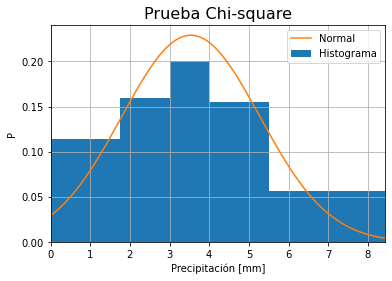

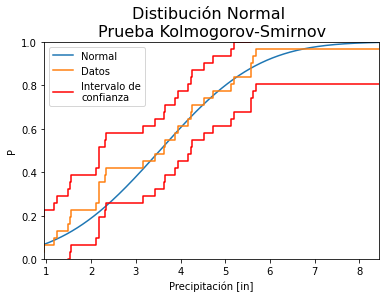

In [180]:
# Ejercicio 3

# Datos
path_d = "../datos/"
fname = "Table 4.8.csv"
df = pd.read_csv(path_d + fname,
    index_col = "Year")
var = "Precipitation"

# Ajuste de parámetros.
mu, sigma = stats.norm.fit( df[var] )
params = 2

# 3.a: Chi-square
# Histograma de datos observados.
bins_lim = [ 0, 1.75, 3, 4, 5.5,
    df[var].max() ]
n_obs, bins = np.histogram( 
    df[var], bins = bins_lim )

# Se discretizan las distribuciones continuas.
n_norm = n_obs.sum() * np.array( [
    stats.norm.cdf(bins_lim[1], mu, sigma),
    stats.norm.cdf(bins_lim[2], mu, sigma) -
    stats.norm.cdf(bins_lim[1], mu, sigma),
    stats.norm.cdf(bins_lim[3], mu, sigma) -
    stats.norm.cdf(bins_lim[2], mu, sigma),
    stats.norm.cdf(bins_lim[4], mu, sigma) -
    stats.norm.cdf(bins_lim[3], mu, sigma),
    stats.norm.sf(bins_lim[4], mu, sigma) 
] )

# Graficamos los datos y las distribuciones.
fig, ax = plt.subplots()

df[var].hist( bins = bins_lim,
    density = True, ax = ax )

x = np.linspace(0, df[var].max(), 1000)
y = stats.norm.pdf(x, mu, sigma)

ax.plot(x, y)

ax.set_title("Prueba Chi-square",
    fontsize = 16)
ax.set_xlabel("Precipitación [mm]")
ax.set_ylabel("P")
ax.legend(["Normal", "Histograma"])
ax.set_xlim(0, bins[-1])
ax.set_ylim(0)

AUTO = False
#AUTO = True
if AUTO:
    # Prueba chi-square automática.
    chi_test = stats.chisquare(
        n_obs, n_norm, ddof = params)
    chi = chi_test.statistic
    p = chi_test.pvalue
else:
    # Prueba chi-square manual.
    chi = ( ( n_obs - n_norm ) ** 2
        / n_norm ).sum()
    alpha = 0.05
    clases = bins.shape[0] - 1
    nu = clases - params - 1
    p = stats.chi.sf(chi, nu)
    crit = stats.chi.ppf(1 - alpha, nu)

print("Chi-square")
print(f"Chi : {chi:.2f}")
print(f"p   : {p:.4f}")
if not AUTO:
    print(f"crit: {crit:.4f}")

# 3.b. Lilliefors
# Prueba Kolmogorov-Smirnov.

# Tamaño de la muestra.
n = df[var].shape[0]

# Frecuencia acumulada.
# Criterio de Weibull.
F = ( range( 1, n + 1 ) /
    np.float64( n + 1 ) )

# Frecuencia acumulada de
# distribución normal.
x = df[var].sort_values()
F_n = stats.norm.cdf(
    x, mu, sigma )

# Smirnov test statistic.
if AUTO:
    # Automático.
    D_s, p = lilliefors( df[var] )
else:
    # Manual.
    D = np.abs( F - F_n )
    D_s = D.max()
    alpha = 0.05
    crit = 0.161

print("")
print("Lilliefors")
print(f"n   : {n}")
print(f"D_s :  {D_s:.3f}")
if AUTO:
    print(f"p   :  {p:.3f}")
if not AUTO:
    print(f"crit:  {crit:.3f}")

# Graficamos las distribuciones.
x_n = np.linspace( df[var].min(),
    df[var].max(), 1000 )
y_n = stats.norm.cdf( x_n, mu, sigma )
fig, ax = plt.subplots()
ax.plot(x_n, y_n)

# Grficamos la frecuencia acumulada.
ax.plot(df[var].sort_values(),
    F, drawstyle = "steps")

# Graficamos los intervalos de confianza.
# Distribución Kolmogorov-Smirnov
ax.plot( x, F - 0.161,
    drawstyle = "steps", color = "red" )
ax.plot( x, F + 0.161,
    drawstyle = "steps", color = "red" )

ax.set_title("Distibución Normal \n"
    "Prueba Kolmogorov-Smirnov",
    fontsize = 16)
ax.set_xlabel("Precipitación [in]")
ax.set_ylabel("P")
ax.legend(["Normal",
    "Datos", "Intervalo de\nconfianza"])
ax.set_xlim( df[var].min(), df[var].max() )
ax.set_ylim(0, 1)